In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml

import datetime

pd.set_option("display.max_columns", 200)
%matplotlib inline


In [117]:
fnames = [
    ("anvil", "nowcasts_anvil.csv"),
    ("steps", "nowcasts_steps.csv"),
    ("sseps", "nowcasts_sseps.csv"),
]


In [118]:
results = {}

for mname, fname in fnames:

    data = pd.read_csv(f"C:/Users/davis.pazars/Documents/orkans/results/{fname}")
    data = data.drop_duplicates()
    data["data_date"] = pd.to_datetime(data["data_date"], format="%Y%m%d%H%M")

    data["date_offset"] = (
        data["data_date"].dt.month * 100 + data["data_date"].dt.day - 320
    ) % 1300

    data["season"] = pd.cut(
        data["date_offset"],
        [0, 300, 602, 900, 1300],
        labels=["spring", "summer", "autumn", "winter"],
    )

    data["date_str"] = data["data_date"].dt.strftime("%Y-%m-%d")

    results[mname] = data


In [234]:
fss_metrics = [col for col in results[list(results.keys())[0]] if "fss" in col]


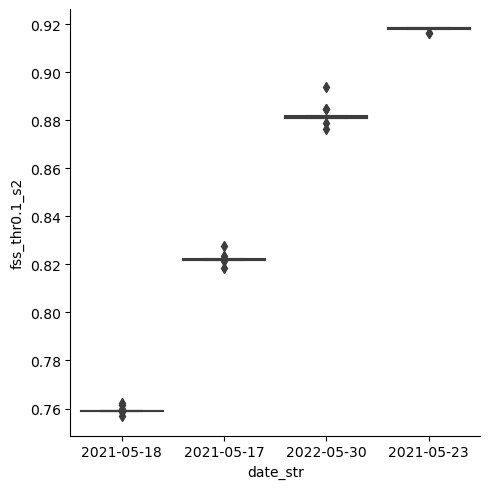

In [235]:
import seaborn as sns

res_anv = results["anvil"]
res_steps = results["steps"]
res_sseps = results["sseps"]

sns.catplot(
    data=res_anv.loc[res_anv["season"] == "spring"],
    x="date_str",
    y=fss_metrics[0],
    kind="box",  # , bw=.25, cut=0, split=True,
)


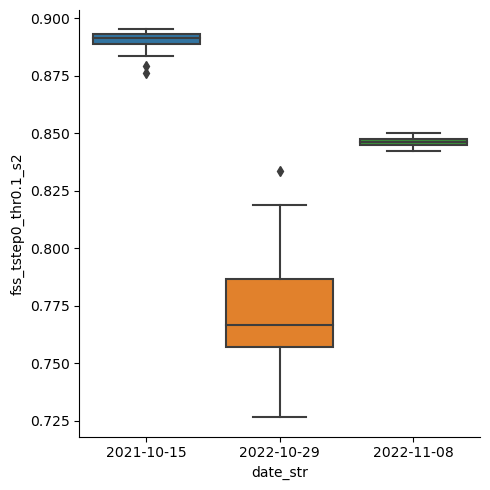

In [236]:
sns.catplot(
    data=res_steps.loc[res_steps["season"] == "autumn"],
    x="date_str",
    y="fss_tstep0_thr0.1_s2",
    kind="box",  # , bw=.25, cut=0, split=True,
)


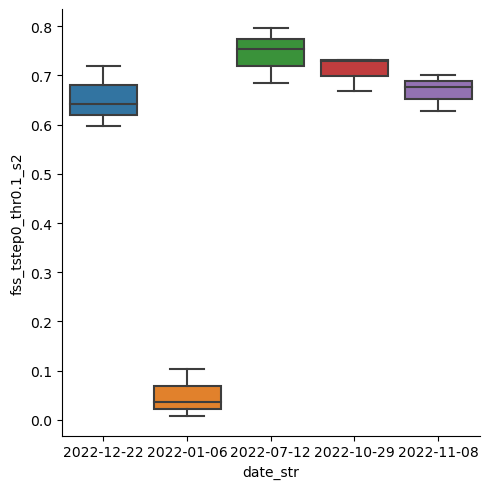

In [238]:
sns.catplot(
    data=res_sseps.loc[res_sseps["data_date"].dt.year == 2022],
    x="date_str",
    y="fss_tstep0_thr0.1_s2",
    kind="box",  # , bw=.25, cut=0, split=True,
)


In [252]:
# Load default model settings
model_name = "steps"

with open("C:/Users/davis.pazars/Documents/orkans/config.yaml", "r") as file:
    cfg = yaml.safe_load(file)

default_model_settings = cfg["model"][model_name]["manual"]

# Values in lists to properly create a DataFrame
for key, value in default_model_settings.items():
    default_model_settings[key] = [value]

default_settings = pd.DataFrame.from_dict(default_model_settings)

settings_names = list(default_model_settings.keys())

default_settings


,n_ens_members,n_cascade_levels,precip_thr,kmperpixel,timestep,extrap_method,decomp_method,bandpass_filter_method,noise_method,noise_stddev_adj,ar_order,vel_pert_method,conditional,probmatching_method,mask_method,seed,num_workers,fft_method,domain,extrap_kwargs,filter_kwargs,noise_kwargs,vel_pert_kwargs,mask_kwargs,measure_time,callback,return_output
0,24,6,None,None,None,semilagrangian,fft,gaussian,nonparametric,None,2,bps,False,cdf,incremental,None,1,numpy,spatial,None,None,None,None,None,False,None,True


In [256]:
# Best settings by season
data = results[model_name]
fss_metrics = [col for col in data.columns if "fss" in col]

data[["season", "data_date", fss_metrics[0]] + settings_names].sort_values(
    by=["data_date", fss_metrics[0]], ascending=[True, False]
).groupby(["season", "data_date"]).head(1)


,season,data_date,fss_tstep0_thr0.1_s2,n_ens_members,n_cascade_levels,precip_thr,kmperpixel,timestep,extrap_method,decomp_method,bandpass_filter_method,noise_method,noise_stddev_adj,ar_order,vel_pert_method,conditional,probmatching_method,mask_method,seed,num_workers,fft_method,domain,extrap_kwargs,filter_kwargs,noise_kwargs,vel_pert_kwargs,mask_kwargs,measure_time,callback,return_output
121,spring,2021-05-17 15:15:00,0.917430,24,6,0.015244,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,mean,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
82,spring,2021-05-18 10:15:00,0.854657,24,6,-6.808101,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
179,spring,2021-05-23 04:15:00,0.967680,24,6,0.010803,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,obs,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
215,summer,2021-06-23 13:15:00,0.856396,24,6,-6.808101,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
289,summer,2021-06-25 01:15:00,0.863103,24,6,-13.273934,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
340,summer,2021-08-11 14:15:00,0.792415,24,6,-6.808101,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spectral,NaN,NaN,NaN,NaN,NaN,False,NaN,True
245,summer,2021-08-17 14:15:00,0.922845,24,6,0.000065,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,mean,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
362,summer,2021-09-12 20:15:00,0.877656,24,6,-6.808101,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,NaN,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
372,summer,2021-09-13 05:15:00,0.885714,5,6,-5.567997,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True
429,autumn,2021-10-15 18:15:00,0.895105,24,6,0.040965,2000.0,15.0,semilagrangian,fft,gaussian,nonparametric,NaN,2,bps,False,cdf,incremental,NaN,1,numpy,spatial,NaN,NaN,NaN,NaN,NaN,False,NaN,True


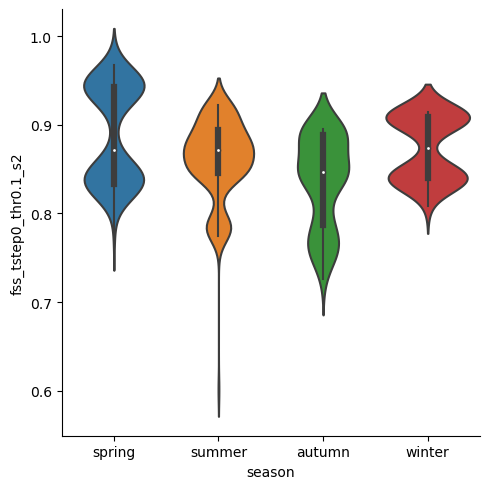

In [262]:
data = results[model_name]

sns.catplot(
    data=data,
    x="season",
    y="fss_tstep0_thr0.1_s2",
    kind="violin",
)


In [ ]:
# What's the score metric difference between best and default settings?
data = results["steps"]
max_score = data.loc[
    data[fss_metrics[0]] == data[fss_metrics[0]].max(), settings_names
].reset_index(drop=True)


In [209]:
# What settings differ between max scoring settings and default?
data = results["steps"]
max_score = data.loc[
    data[fss_metrics[0]] == data[fss_metrics[0]].max(), settings_names
].reset_index(drop=True)

default_settings.compare(max_score)


mask_method      
          self other
0  incremental   obs